#시나리오 1: 컬럼에 직접 해당하는 단어의 갯수만 카운트한다

### pdf 파일 텍스트 읽어오기

In [ ]:
import fitz

In [ ]:
# path = "./(1권) 2024년 청소년사업 안내_1.30.pdf"
# path = "./(2권) 2024년 청소년사업 안내_1.30.pdf"
# path = "./2024년+학생건강증진+분야+주요업무+추진방향.pdf"
# path = "./2023년 학생건강증진 분야 주요업무 추진방향 230111.pdf"
# path = "./제19차(2023)+청소년건강행태조사+결과발표회+자료집_최종 (1).pdf" -> 주요내용 모두 표로 이뤄져 무의미
# path = "./231228_김현숙_여성가족부_장관_2024년_신년사_최종배포본.pdf" -> 청소년이 메인이 아님, 기각
# path = "./[3.28.목.행사시작(14시)이후] 2023년 학생 건강검사 표본통계 및 청소년건강행태조사 결과 발표 (1).pdf"
path = "./data/★2022년 청소년 매체이용 및 유해환경 실태조사.pdf"

doc = fitz.open(path)

text = ""
for page in doc:
    text += page.get_text()

print(text)

# Save text to a text file
with open('./★2022년 청소년 매체이용 및 유해환경 실태조사.txt', 'w', encoding='utf-8') as file:
    file.write(text)

### 단어 조합 검색 위해 띄어쓰기 없애기

In [139]:
def remove_space(input_file, output_file):
    try:
        with open(input_file,'r',encoding='utf-8') as f:
            text = f.read()
        
        text_without_space = ''.join(text.split())
        
        # 새로운 파일에 결과 저장
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write(text_without_space)
        
        print("텍스트 파일에서 공백을 제거하여", output_file, "에 저장했습니다.")
    
    except FileNotFoundError:
        print("파일을 찾을 수 없습니다.")
        
    except Exception as e:
        print("오류가 발생했습니다:", str(e))

# 입력 및 출력 파일 경로 설정
input_file = './data/[3.28.목.행사시작(14시)이후] 2023년 학생 건강검사 표본통계 및 청소년건강행태조사 결과 발표 (1).txt'  
output_file = './data/[3.28.목.행사시작(14시)이후] 2023년 학생 건강검사 표본통계 및 청소년건강행태조사 결과 발표 (1)_공백제거.txt'  

# 함수 호출
remove_space(input_file, output_file)

텍스트 파일에서 공백을 제거하여 ./[3.28.목.행사시작(14시)이후] 2023년 학생 건강검사 표본통계 및 청소년건강행태조사 결과 발표 (1)_공백제거.txt 에 저장했습니다.


### 컬럼 별 중심단어 찾기 - 명사 찾기

In [140]:
from konlpy.tag import Okt
from collections import Counter
import csv

def count_specific_words(text, specific_words):
    # Okt 형태소 분석기 초기화
    okt = Okt() 
    # 명사만 추출
    nouns = okt.nouns(text)
    # Counter 객체를 사용하여 각 단어의 빈도를 세기
    word_counter = Counter(nouns)
    # 각 단어의 빈도를 저장할 딕셔너리 초기화
    word_counts = {word: word_counter.get(word, 0) for word in specific_words}
    return word_counts

# 텍스트 파일 경로
file_path = "./data/[3.28.목.행사시작(14시)이후] 2023년 학생 건강검사 표본통계 및 청소년건강행태조사 결과 발표 (1)_공백제거.txt"

# 찾고자 하는 단어들
target_words = ['신체활동','운동','근력','유산소','비만','체중','과체중','흡연','담배',
                '음주','주류','식생활','아침','과일','패스트푸드','구강','치아',
                '위생','손씻기','아토피','천식','알레르기','약물','마약','카페인',
                '인터넷','스마트폰','중독',
                '수면','우울','자살','스트레스','외로움','불안','행복',
                '학교폭력','학교 폭력','청소년폭력','성폭력','성추행','성매매','가출','유해업소','출입제한','출입금지',
                '사행','대출','보호자','교사','친구','기관','상담기관','지원기관','센터','상담센터','지원센터',
                '성교육','매체이용교육','안전','교육','안전교육','개인정보보호교육','예방교육']  

try:
    # 텍스트 파일 읽기
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
except FileNotFoundError:
    print("파일을 찾을 수 없습니다.")
    exit()
except Exception as e:
    print("파일을 읽는 도중 오류가 발생했습니다:", str(e))
    exit()
    
# 특정 단어들의 개수 세기
word_counts = count_specific_words(text, target_words)


# 결과를 CSV 파일에 쓰기
output_file = "word_counts.csv"
with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['단어', '빈도'])
    for word, count in word_counts.items():
        writer.writerow([word, count])
        print(f'"{word}"의 등장 횟수: {count}')

print(f"결과가 {output_file}에 저장되었습니다.")


"신체활동"의 등장 횟수: 0
"운동"의 등장 횟수: 1
"근력"의 등장 횟수: 1
"유산소"의 등장 횟수: 0
"비만"의 등장 횟수: 19
"체중"의 등장 횟수: 1
"과체중"의 등장 횟수: 11
"흡연"의 등장 횟수: 9
"담배"의 등장 횟수: 5
"음주"의 등장 횟수: 13
"주류"의 등장 횟수: 0
"식생활"의 등장 횟수: 8
"아침"의 등장 횟수: 0
"과일"의 등장 횟수: 2
"패스트푸드"의 등장 횟수: 1
"구강"의 등장 횟수: 4
"치아"의 등장 횟수: 1
"위생"의 등장 횟수: 2
"손씻기"의 등장 횟수: 0
"아토피"의 등장 횟수: 2
"천식"의 등장 횟수: 2
"알레르기"의 등장 횟수: 0
"약물"의 등장 횟수: 2
"마약"의 등장 횟수: 0
"카페인"의 등장 횟수: 0
"인터넷"의 등장 횟수: 3
"스마트폰"의 등장 횟수: 2
"중독"의 등장 횟수: 2
"수면"의 등장 횟수: 1
"우울"의 등장 횟수: 2
"자살"의 등장 횟수: 0
"스트레스"의 등장 횟수: 4
"외로움"의 등장 횟수: 0
"불안"의 등장 횟수: 0
"행복"의 등장 횟수: 1
"학교폭력"의 등장 횟수: 0
"학교 폭력"의 등장 횟수: 0
"청소년폭력"의 등장 횟수: 0
"성폭력"의 등장 횟수: 0
"성추행"의 등장 횟수: 0
"성매매"의 등장 횟수: 0
"가출"의 등장 횟수: 0
"유해업소"의 등장 횟수: 0
"출입제한"의 등장 횟수: 0
"출입금지"의 등장 횟수: 0
"사행"의 등장 횟수: 0
"대출"의 등장 횟수: 0
"보호자"의 등장 횟수: 0
"교사"의 등장 횟수: 2
"친구"의 등장 횟수: 0
"기관"의 등장 횟수: 4
"상담기관"의 등장 횟수: 0
"지원기관"의 등장 횟수: 0
"센터"의 등장 횟수: 0
"상담센터"의 등장 횟수: 0
"지원센터"의 등장 횟수: 0
"성교육"의 등장 횟수: 0
"매체이용교육"의 등장 횟수: 0
"안전"의 등장 횟수: 2
"교육"의 등장 횟수: 5
"안전교육"의 등장 횟수: 0
"개인정보보호교육"의 등장 횟수: 0
"예방교육"의 등

## V.2 단어 세기 - okt 형태소 분석 + 연속단어(띄어쓰기) 반영

In [17]:
#이슈 있음 - 정작 품사 다른 단어가 붙어있을 경우 찾아내지 못함 개빡

def merge_adjacent_words(text, search_words):
    # 형태소 분석
    words = okt.pos(text, join=True)

    # 인접한 단어를 합쳐서 처리하기 위한 임시 리스트
    processed_words = []

    i = 0
    while i < len(words):
        merged = words[i]
        for j in range(1, len(words) - i):
            if words[i + j].split('/')[1] == 'Space':
                merged += words[i + j]
            else:
                break
        found = False
        # 모든 검색 단어에 대해 검사하여 연속된 경우 처리
        for word in search_words:
            if merged.startswith(word):
                processed_words.append(word)
                i += j
                found = True
                break
        if not found:
            processed_words.append(words[i])
            i += 1

    # 연속된 경우를 재처리
    merged_text = ' '.join(processed_words)

    return merged_text

# '유해업소'를 search_words에 추가하고 '유해'와 '업소'를 삭제합니다.
search_words.append('유해업소')
search_words.remove('유해')
search_words.remove('업소')

# merged_text에 대한 수정된 코드를 사용하여 떨어져 있는 단어를 합친 후의 텍스트를 얻습니다.
merged_text = merge_adjacent_words(text, search_words)

# 빈도 계산 함수를 사용하여 target_words에 대한 빈도를 계산합니다.
target_word_counts = count_specific_words(merged_text, target_words)

# 결과를 CSV 파일에 씁니다.
output_file = "word_counts.csv"
with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['단어', '빈도'])
    for word, count in target_word_counts.items():
        writer.writerow([word, count])
        print(f'"{word}"의 등장 횟수: {count}')

print(f"결과가 {output_file}에 저장되었습니다.")


"신체활동"의 등장 횟수: 0
"운동"의 등장 횟수: 9
"근력"의 등장 횟수: 0
"유산소"의 등장 횟수: 0
"비만"의 등장 횟수: 4
"체중"의 등장 횟수: 6
"과체중"의 등장 횟수: 0
"흡연"의 등장 횟수: 10
"담배"의 등장 횟수: 1
"음주"의 등장 횟수: 8
"주류"의 등장 횟수: 1
"식생활"의 등장 횟수: 6
"아침"의 등장 횟수: 2
"과일"의 등장 횟수: 3
"영양"의 등장 횟수: 7
"영양상태"의 등장 횟수: 0
"영양관리"의 등장 횟수: 0
"패스트푸드"의 등장 횟수: 0
"구강"의 등장 횟수: 9
"치아"의 등장 횟수: 1
"위생"의 등장 횟수: 56
"손씻기"의 등장 횟수: 0
"아토피"의 등장 횟수: 0
"천식"의 등장 횟수: 0
"알레르기"의 등장 횟수: 1
"약물"의 등장 횟수: 48
"마약"의 등장 횟수: 4
"카페인"의 등장 횟수: 0
"인터넷중독"의 등장 횟수: 0
"스마트폰"의 등장 횟수: 229
"디지털미디어"의 등장 횟수: 0
"게임중독"의 등장 횟수: 0
"중독"의 등장 횟수: 81
"수면"의 등장 횟수: 4
"우울"의 등장 횟수: 39
"자살"의 등장 횟수: 61
"자해"의 등장 횟수: 26
"스트레스"의 등장 횟수: 19
"외로움"의 등장 횟수: 8
"불안"의 등장 횟수: 33
"행복"의 등장 횟수: 196
"학교폭력"의 등장 횟수: 0
"청소년폭력"의 등장 횟수: 0
"성폭력"의 등장 횟수: 76
"성추행"의 등장 횟수: 2
"성매매"의 등장 횟수: 37
"가출"의 등장 횟수: 115
"유해업소"의 등장 횟수: 0
"유해"의 등장 횟수: 165
"업소"의 등장 횟수: 30
"출입제한"의 등장 횟수: 0
"출입금지"의 등장 횟수: 0
"제한"의 등장 횟수: 105
"금지업소"의 등장 횟수: 0
"제한업소"의 등장 횟수: 0
"사행"의 등장 횟수: 2
"대출"의 등장 횟수: 0
"보호자"의 등장 횟수: 291
"교사"의 등장 횟수: 41
"친구"의 등장 횟수: 58
"기관"의 등장 횟수: 1153
"상담기관"

In [13]:
merged_text

'Ⅱ \n 제 1 편 2024년 도 청소년 사업 현황 및 방향 Ⅰ . 청소년 정책 현황 · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · 3 \n Ⅱ . 2024년 도 사업 주요 사항 · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · 11 \n Ⅲ . 2024년 도 주요 사업 변경 및 신설 내용 · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · \n · 19 \n 제 2

In [149]:
# 오류

'''
from konlpy.tag import Okt
from collections import Counter

# 텍스트 파일 경로
file_path = "./(1권) 2024년 청소년사업 안내_1.30.txt"

# 찾고자 하는 단어들
target_words = ['신체활동','운동','근력','유산소','비만','체중','과체중',
                '흡연','담배','음주','주류',
                '식생활','아침','과일','영양상태','영양관리','패스트푸드',
                '구강','치아','위생','손씻기','아토피','천식','알레르기',
                '약물','마약','카페인','인터넷중독','스마트폰','디지털미디어','게임중독','중독',
                '수면','우울','자살','스트레스','외로움','불안','행복',
                '학교폭력','청소년폭력','성폭력','성추행','성매매',
                '가출','유해업소','출입제한','출입금지',
                '사행','대출','보호자','교사','친구',
                '기관','상담기관','지원기관','센터','상담센터','지원센터',
                '성교육','안전','교육','안전교육',
                '개인정보보호교육','청결지도','매체이용교육','예방교육']  

try:
    # 텍스트 파일 읽기
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
except FileNotFoundError:
    print("파일을 찾을 수 없습니다.")
    exit()
except Exception as e:
    print("파일을 읽는 도중 오류가 발생했습니다:", str(e))
    exit()

# Okt 객체 생성
okt = Okt()

def count_specific_words(text, specific_words):
    # 형태소 분석
    words = okt.pos(text, join=True)

    # "안전"과 "교육"이 인접해 있는 경우를 찾아서 복합명사로 처리
    processed_words = []
    
    i = 0
    while i < len(words):
        if i < len(words) - 1 and words[i].startswith("영양") and words[i+1].startswith("상태"):
            processed_words.append("영양상태/Noun")
            i += 2
        elif i < len(words) - 1 and words[i].startswith("영양") and words[i+1].startswith("관리"):
            processed_words.append("영양관리/Noun")
            i += 2
        elif i < len(words) - 1 and words[i].startswith("인터넷") and words[i+1].startswith("중독"):
            processed_words.append("인터넷중독/Noun")
            i += 2
        elif i < len(words) - 1 and words[i].startswith("게임") and words[i+1].startswith("중독"):
            processed_words.append("게임중독/Noun")
            i += 2
        elif i < len(words) - 1 and words[i].startswith("학교") and words[i+1].startswith("폭력"):
            processed_words.append("학교폭력/Noun")
            i += 2
        elif i < len(words) - 1 and words[i].startswith("매체이용") and words[i+1].startswith("교육"):
            processed_words.append("매체이용교육/Noun")
            i += 2
        elif i < len(words) - 1 and words[i].startswith("매체") and words[i+1].startswith("이용") and words[i+2].startswith("교육"):
            processed_words.append("매체이용교육/Noun")
            i += 3
        elif i < len(words) - 1 and words[i].startswith("안전") and words[i+1].startswith("교육"):
            processed_words.append("안전교육/Noun")
            i += 2
        elif i < len(words) - 1 and words[i].startswith("청결") and words[i+1].startswith("지도"):
            processed_words.append("청결지도/Noun")
            i += 2
        elif i < len(words) - 1 and words[i].startswith("예방") and words[i+1].startswith("교육"):
            processed_words.append("예방교육/Noun")
            i += 2
        else:
            processed_words.append(words[i])
            i += 1

    # Counter 객체를 사용하여 각 단어의 빈도를 세기
    word_counter = Counter(processed_words)
    
    # 각 단어의 빈도를 저장할 딕셔너리 초기화
    word_counts = {word: word_counter.get(word, 0) for word in specific_words}
    
    return word_counts

# 함수 호출 결과를 변수에 저장
result = count_specific_words(text, target_words)
# 결과 출력
print(result)
'''

{'신체활동': 0, '운동': 0, '근력': 0, '유산소': 0, '비만': 0, '체중': 0, '과체중': 0, '흡연': 0, '담배': 0, '음주': 0, '주류': 0, '식생활': 0, '아침': 0, '과일': 0, '영양상태': 0, '영양관리': 0, '패스트푸드': 0, '구강': 0, '치아': 0, '위생': 0, '손씻기': 0, '아토피': 0, '천식': 0, '알레르기': 0, '약물': 0, '마약': 0, '카페인': 0, '인터넷중독': 0, '스마트폰': 0, '디지털미디어': 0, '게임중독': 0, '중독': 0, '수면': 0, '우울': 0, '자살': 0, '스트레스': 0, '외로움': 0, '불안': 0, '행복': 0, '학교폭력': 0, '청소년폭력': 0, '성폭력': 0, '성추행': 0, '성매매': 0, '가출': 0, '유해업소': 0, '출입제한': 0, '출입금지': 0, '사행': 0, '대출': 0, '보호자': 0, '교사': 0, '친구': 0, '기관': 0, '상담기관': 0, '지원기관': 0, '센터': 0, '상담센터': 0, '지원센터': 0, '성교육': 0, '안전': 0, '교육': 0, '안전교육': 0, '개인정보보호교육': 0, '청결지도': 0, '매체이용교육': 0, '예방교육': 0}


## 단어 빈도분석과 워드클라우드

In [107]:
from konlpy.tag import Kkma
kkma = Kkma()
import nltk

In [21]:
# 전문 읽기
from konlpy.corpus import kobill
# doc_ko = open('./231228_김현숙_여성가족부_장관_2024년_신년사_최종배포본.txt').read()
doc_ko = open('./★2022년 청소년 매체이용 및 유해환경 실태조사.txt').read()
doc_ko

'발간등록번호\n11-1383000-000819-11\n연구보고\n22-수탁12\n2022년 청소년 매체이용 및 유해환경 실태조사\n2022. 12.\n책임연구원 : 김지경(한국청소년정책연구원･선임연구위원)\n공동연구원 : 송현주(H통계연구소･대표)\n            김균희(인하대학교･연구교수)\n              정윤미(한국청소년정책연구원･전문연구원)\n연구보조원 : 변주영(한국청소년정책연구원･연구원)\n조사 기관 : (주)한국리서치\n여  성  가  족  부\n본 보고서는 한국청소년정책연구원･(주)한국리서치가 여성가족부의 연구\n용역 의뢰를 받아 수행한 연구의 결과입니다. 보고서의 내용은 연구진의 \n의견이며, 여성가족부의 공식적인 입장이 아님을 밝혀둡니다.\n이용자를 위하여\n1. 이 보고서는 ｢청소년보호법｣ 제33조 제4항에 의해 실시되는 ｢청소년 매체이용 및 유해환경 \n실태조사｣(국가승인통계, 제167001호)의 2022년 조사 결과를 수록한 것임.\n- ｢청소년 매체이용 및 유해환경 실태조사｣는 ｢청소년보호법｣ 제33조 제4항 “여성가족부장관은 \n종합대책의 효과적 수립‧시행을 위하여 청소년의 유해환경에 대한 접촉실태조사를 정기적으로 \n실시(이하 생략)”를 근거로 하며,\n- 기존 ｢청소년 매체이용 실태조사｣와 ｢청소년 유해환경접촉 종합실태조사｣를 통합하여 실시한 \n2016년 제1차 조사에 이어 법령(청소년보호법 시행규칙 제8조의5 제1항)에 따라 2년마다 \n실시, 2022년 조사는 통합 이후 네 번째 조사임.\n2. 이 조사는 전국의 초등학교 4학년~6학년, 중학교 1학년~3학년, 고등학교 1학년~3학년에 \n재학 중인 학생들을 모집단으로 함. 2022년 조사 참여 대상자는 총 17,140명(초등학생 \n5,249명, 중학생 5,490명, 고등학생 6,401명)이며, 조사 영역별로 조사 대상에 차이가 \n있음. \n- 매체 영역, 행위 영역 및 사회인구학적 배경 : 초등학생, 중학생, 고등학생 대상\n- 약물 영역, 업소 영역,

In [22]:
# 단어 뽑아내기
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['발간',
 '등록',
 '번호',
 '연구',
 '보고',
 '수탁',
 '청소년',
 '매체',
 '이용',
 '및',
 '유해',
 '환경',
 '실태',
 '조사',
 '책임',
 '연구원',
 '김',
 '지경',
 '한국',
 '청소년',
 '정책',
 '연구원',
 '선임',
 '연구',
 '위원',
 '공동',
 '연구원',
 '송현주',
 '통계',
 '연구소',
 '대표',
 '김균',
 '인하',
 '대학교',
 '연구',
 '교수',
 '정윤',
 '한국',
 '청소년',
 '정책',
 '연구원',
 '전문',
 '연구원',
 '보조',
 '변',
 '주영',
 '한국',
 '청소년',
 '정책',
 '연구원',
 '연구원',
 '조사',
 '기관',
 '주',
 '한국',
 '리서치',
 '여',
 '성',
 '족',
 '부',
 '보고서',
 '한국',
 '청소년',
 '정책',
 '연구원',
 '주',
 '한국',
 '리서치',
 '여성가족부',
 '연구',
 '용역',
 '의뢰',
 '수행',
 '연구',
 '결과',
 '보고서',
 '내용',
 '연구',
 '진의',
 '의견',
 '여성가족부',
 '공식',
 '입장',
 '이용자',
 '위',
 '이',
 '보고서',
 '청소년',
 '보호',
 '법',
 '제',
 '제',
 '항',
 '실시',
 '청소년',
 '매체',
 '이용',
 '및',
 '유해',
 '환경',
 '실태',
 '조사',
 '국가승인',
 '통계',
 '제',
 '호',
 '의',
 '조사',
 '결과',
 '수록',
 '것임',
 '청소년',
 '매체',
 '이용',
 '및',
 '유해',
 '환경',
 '실태',
 '조사',
 '청소년',
 '보호',
 '법',
 '제',
 '제',
 '항',
 '여성가족부',
 '장관',
 '종합',
 '대책',
 '효과',
 '수립',
 '시행',
 '위',
 '청소년',
 '유해',
 '환경',
 '대한',
 '접촉',
 '실태',
 '조사',
 '정기',


In [23]:
# 단어 세기 - 명사만 추출
ko = nltk.Text(tokens_ko)
print(len(ko.tokens)) #단어 총 개수세기
print(len(set(ko.tokens))) #단어 유니크 개수 세기
ko.vocab()

68777
2226


FreqDist({'청소년': 1771, '이용': 1573, '및': 1234, '경험': 1174, '조사': 876, '응답': 862, '매체': 798, '유해': 755, '등': 700, '교육': 690, ...})

### 시각화해서 빈도 보기

In [24]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

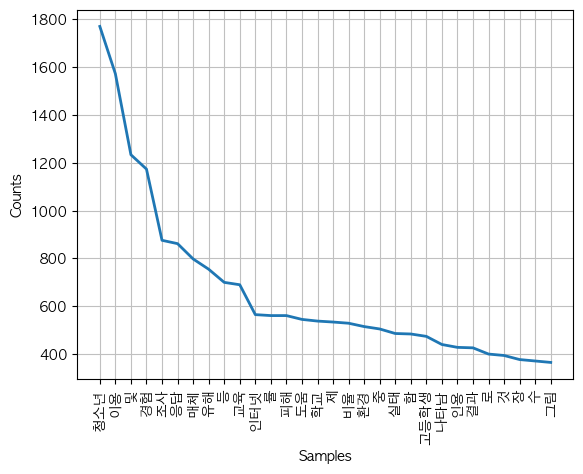

In [25]:
# 단어 별 개수 시각화
plt.figure()
ko.plot(30)
plt.show()

#### 필요 없는 단어 제거

In [97]:
#필요 없는 단어 제거

#학생/청소년 관련 자료 정제
#여가부 청소년 매체 및 유해환경 실태 자료 정제 용
stop_words = ['청소년','지원','및','등','시','제','운영','사업', '경우','참여','위원회','법',
             '수','이상','명','비','신청', '편', '실적', '평가', '관', '담당',
             '가능','대상','계','내','도','위','내용','구','발급','프로그램','위원',
             '함','학교','교육','학생', '연구원', '이용', '조사', '수탁', '경험', '응답', '률',
             '비율', '중','로','것','장','외','과','앱','표','이','물','사','조','가장','전체',
             '임','분','석','결','주','나타남','인용','결과','고등학생','그림','최근','여부','분석',
             '적','의','별','대리','구입','문항','자료','확인','사람','실태','성별','남학생','여학생',
             '고등학생','중학생','김','간','지경','제외','관련','남자','여자','증가','대안','김지연',
             '수정','서비스','구분','동안','고','별로','사용','를','단위','개월','개','방법','초등학생',
             '사실','일반','다른','고등학교','정도','추가','무','세','나이','평균','요','감소','접촉','이용자',
             '방','표본','영역','점','율','통해','다음','사례','주요',
             # 2차 정제 - 워드클라우드 용
             '인터넷','매체','유해','피해', '환경', '도움']

# #여가부 신년사 정제 - 불필요한 단어만
# stop_words = ['수','등','세','를','더','분','닉','습','위','또한','뜻']

ko = [each_word for each_word in ko if each_word not in stop_words]

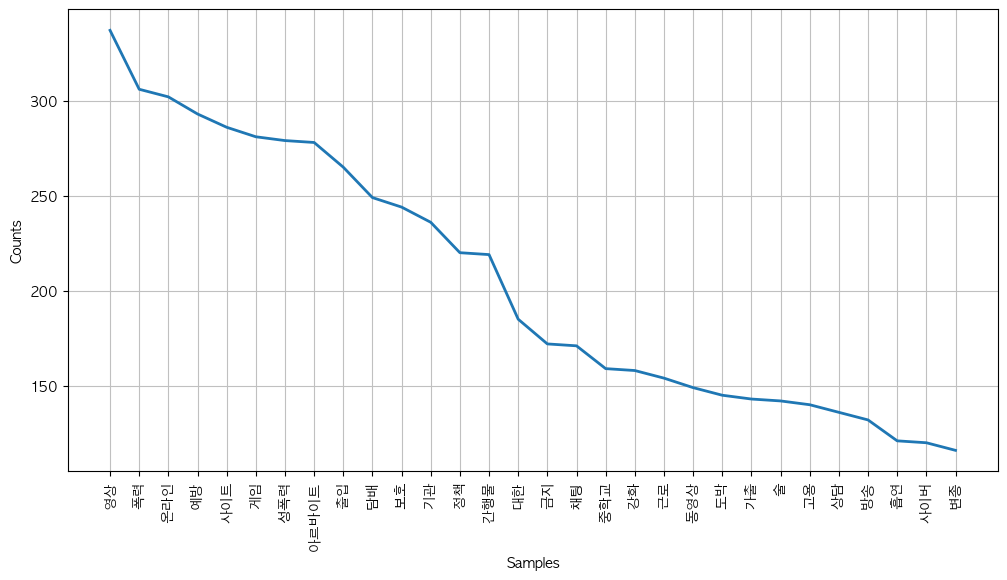

In [98]:
# 리스트를 nltk.Text 객체로 변환
ko_edited = nltk.Text(ko, name='여가부 매체 및 유해환경')

# 시각화
plt.figure(figsize=(12,6))
ko_edited.plot(30)
plt.show()

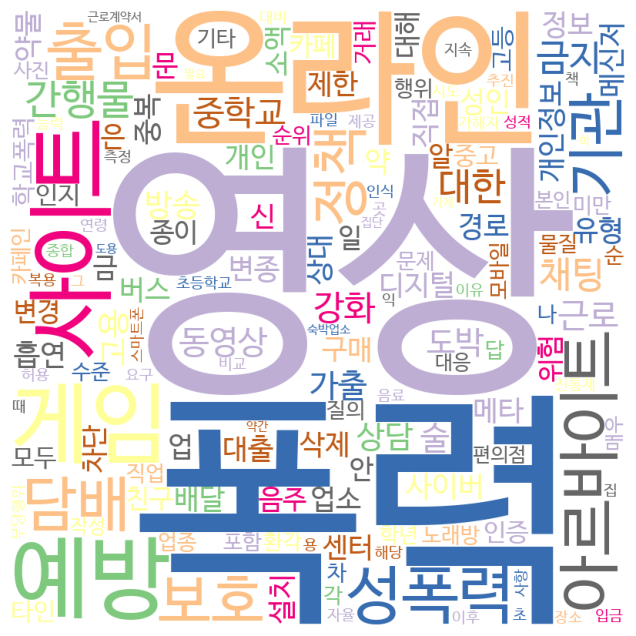

In [104]:
from wordcloud import WordCloud, STOPWORDS

data = ko_edited.vocab().most_common(150)
wordcloud = WordCloud(font_path = './NanumBarunGothic.ttf',
                      background_color='white', 
                      colormap = 'Accent_r', 
                      width = 800,
                      height = 800).generate_from_frequencies(dict(data))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 영광의 단어 찾기 실패작들

In [92]:
ko.count('수면')

0

In [94]:
# # 텍스트 파일에서 단어 개수 세는 함수 정의
# def count_words(file_path, target_words):
#     word_counts = {word: 0 for word in target_words}  # 각 단어의 등장 횟수를 저장할 딕셔너리 초기화

#     # 텍스트 파일 열고 단어 개수 세기
#     with open(file_path, 'r', encoding='utf-8') as file:
#         for line in file:
#             words = line.split()  # 공백을 기준으로 단어들을 분리
#             for word in words:
#                 # 각 단어가 등장할 때마다 카운트를 증가시킴
#                 if word in target_words:
#                     word_counts[word] += 1

#     return word_counts

# # 텍스트 파일 경로
# file_path = './(1권) 2024년 청소년사업 안내_1.30.txt'  # 텍스트 파일의 경로를 적절히 수정해주세요.

# # 찾고자 하는 단어들
# target_words = ['신체활동','비만','흡연','음주','식생활','구강','위생','아토피','천식',
#                '약물','인터넷','중독','수면','음주','자살','스트레스','외로움','불안',
#                '행복','학교폭력','성폭력','유해업소','사행','대출','보호자','교사','친구',
#                '기관','센터','성교육','안전']  # 실제 찾고자 하는 단어들로 변경해주세요.

# # 단어 개수 세기
# word_counts = count_words(file_path, target_words)

# # 결과 출력
# for word, count in word_counts.items():
#     print(f'"{word}"의 등장 횟수: {count}')

--> 오류! ~을, ~를 등 붙은 단어를 찾아내지 못함. 첫 번째 KoNLPy의 Okt 형태소 분석기 활용

"신체활동"의 등장 횟수: 0
"비만"의 등장 횟수: 0
"흡연"의 등장 횟수: 0
"음주"의 등장 횟수: 0
"식생활"의 등장 횟수: 0
"구강"의 등장 횟수: 0
"위생"의 등장 횟수: 3
"아토피"의 등장 횟수: 0
"천식"의 등장 횟수: 0
"약물"의 등장 횟수: 2
"인터넷"의 등장 횟수: 6
"중독"의 등장 횟수: 3
"수면"의 등장 횟수: 0
"자살"의 등장 횟수: 2
"스트레스"의 등장 횟수: 0
"외로움"의 등장 횟수: 0
"불안"의 등장 횟수: 0
"행복"의 등장 횟수: 1
"학교폭력"의 등장 횟수: 2
"성폭력"의 등장 횟수: 2
"유해업소"의 등장 횟수: 0
"사행"의 등장 횟수: 0
"대출"의 등장 횟수: 0
"보호자"의 등장 횟수: 21
"교사"의 등장 횟수: 2
"친구"의 등장 횟수: 0
"기관"의 등장 횟수: 40
"센터"의 등장 횟수: 29
"성교육"의 등장 횟수: 1
"안전"의 등장 횟수: 10


### 공백이 있는 단어를 찾아보려던 애타는 노력들

In [ ]:
# # Okt.pos #품사태깅
# from konlpy.tag import Okt; t = Okt()
# from collections import Counter

# def count_specific_words(text, specific_words):
#     # Okt 형태소 분석기 초기화
#     okt = Okt() 
#     # 명사만 추출
#     pos = okt.pos
#     # Counter 객체를 사용하여 각 단어의 빈도를 세기
#     word_counter = Counter(pos)
#     # 각 단어의 빈도를 저장할 딕셔너리 초기화
#     word_counts = {word: word_counter[word] for word in specific_words}
#     return word_counts

# # 텍스트 파일 경로
# # file_path = './(1권) 2024년 청소년사업 안내_1.30.txt' 
# # file_path = './(2권) 2024년 청소년사업 안내_1.30.txt'
# # file_path = './2024년+학생건강증진+분야+주요업무+추진방향.txt'
# # file_path = './2023년 학생건강증진 분야 주요업무 추진방향 230111.txt'
# # file_path = './231228_김현숙_여성가족부_장관_2024년_신년사_최종배포본.txt' -> 청소년 국한 발표가 아니라 무의미
# file_path = "./[3.28.목.행사시작(14시)이후] 2023년 학생 건강검사 표본통계 및 청소년건강행태조사 결과 발표 (1).txt"


# # 찾고자 하는 단어들
# target_words = ['신체 활동','운동','비만','흡연','음주','식생활','구강','위생','아토피','천식',
#                '약물','인터넷','중독','수면','우울','자살','스트레스','외로움','불안',
#                '행복','학교폭력','성폭력','유해업소','사행','대출','보호자','교사','친구',
#                '기관','센터','성교육','안전']  

# # 텍스트 파일 읽기
# with open(file_path, 'r', encoding='utf-8') as file:
#     text = file.read()

# # 특정 단어들의 개수 세기
# word_counts = count_specific_words(text, target_words)

# # 결과 출력
# for word, count in word_counts.items():
#     print(f'"{word}"의 등장 횟수: {count}')

In [7]:
# 단어+품사 뽑아내기
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.pos(doc_ko)
tokens_ko 

[('-', 'Punctuation'),
 ('1', 'Number'),
 ('-', 'Punctuation'),
 ('\n', 'Foreign'),
 ('※', 'Foreign'),
 ('보도', 'Noun'),
 ('일시', 'Noun'),
 (':', 'Punctuation'),
 ('2023.12', 'Number'),
 ('.', 'Punctuation'),
 ('29', 'Number'),
 ('.(', 'Punctuation'),
 ('금', 'Noun'),
 (')', 'Punctuation'),
 ('오후', 'Noun'),
 ('15시', 'Number'),
 ('이후', 'Noun'),
 ('\n', 'Foreign'),
 ('2024년', 'Number'),
 ('김현숙', 'Noun'),
 ('여성가족부', 'Noun'),
 ('장관', 'Noun'),
 ('신년사', 'Noun'),
 ('\n', 'Foreign'),
 ('안녕하십니까', 'Noun'),
 ('.', 'Punctuation'),
 ('푸른', 'Noun'),
 ('용의', 'Noun'),
 ('해', 'Noun'),
 (',', 'Punctuation'),
 ('갑진년', 'Noun'),
 ('새해', 'Noun'),
 ('가', 'Josa'),
 ('밝았습니다', 'Verb'),
 ('.', 'Punctuation'),
 ('힘찬', 'Adjective'),
 ('기세', 'Noun'),
 ('로', 'Josa'),
 ('상승', 'Noun'),
 ('하는', 'Verb'),
 ('용의', 'Noun'),
 ('움직임', 'Noun'),
 ('처럼', 'Josa'),
 ('목표', 'Noun'),
 ('를', 'Josa'),
 ('향', 'Noun'),
 ('해', 'Verb'),
 ('거침', 'Verb'),
 ('없이', 'Adverb'),
 ('전진', 'Noun'),
 ('하고', 'Josa'),
 (',', 'Punctuation'),
 ('뜻', 'Noun

In [10]:
for n in tokens_ko:
    print (n[1])

Punctuation
Number
Punctuation
Foreign
Foreign
Noun
Noun
Punctuation
Number
Punctuation
Number
Punctuation
Noun
Punctuation
Noun
Number
Noun
Foreign
Number
Noun
Noun
Noun
Noun
Foreign
Noun
Punctuation
Noun
Noun
Noun
Punctuation
Noun
Noun
Josa
Verb
Punctuation
Adjective
Noun
Josa
Noun
Verb
Noun
Noun
Josa
Noun
Josa
Noun
Verb
Verb
Adverb
Noun
Josa
Punctuation
Noun
Verb
Noun
Noun
Noun
Josa
Verb
Noun
Verb
Verb
Punctuation
Number
Noun
Noun
Josa
Foreign
Noun
Noun
Noun
Verb
Verb
Noun
Punctuation
Noun
Josa
Adverb
Verb
Noun
Noun
Punctuation
Noun
Noun
Noun
Noun
Josa
Noun
Josa
Verb
Noun
Verb
Foreign
Eomi
Punctuation
Noun
Noun
Josa
Verb
Noun
Punctuation
Noun
Noun
Josa
Noun
Verb
Noun
Punctuation
Verb
Noun
Adverb
Noun
Josa
Verb
Adjective
Noun
Punctuation
Noun
Noun
Josa
Noun
Josa
Noun
Verb
Adjective
Noun
Noun
Noun
Verb
Noun
Adverb
Noun
Josa
Noun
Josa
Verb
Noun
Adjective
Noun
Verb
Verb
Punctuation
Adjective
Noun
Josa
Noun
Punctuation
Noun
Punctuation
Noun
Noun
Adjective
Noun
Suffix
Josa
Noun
Verb
Verb


In [15]:
#단어와 품사 튜플 뽑아내기
[n for n in tokens_ko if 'Noun' == n[1] or 'Verb' == n[1]]
#Adjective : 형용사

[('보도', 'Noun'),
 ('일시', 'Noun'),
 ('금', 'Noun'),
 ('오후', 'Noun'),
 ('이후', 'Noun'),
 ('김현숙', 'Noun'),
 ('여성가족부', 'Noun'),
 ('장관', 'Noun'),
 ('신년사', 'Noun'),
 ('안녕하십니까', 'Noun'),
 ('푸른', 'Noun'),
 ('용의', 'Noun'),
 ('해', 'Noun'),
 ('갑진년', 'Noun'),
 ('새해', 'Noun'),
 ('밝았습니다', 'Verb'),
 ('기세', 'Noun'),
 ('상승', 'Noun'),
 ('하는', 'Verb'),
 ('용의', 'Noun'),
 ('움직임', 'Noun'),
 ('목표', 'Noun'),
 ('향', 'Noun'),
 ('해', 'Verb'),
 ('거침', 'Verb'),
 ('전진', 'Noun'),
 ('뜻', 'Noun'),
 ('하신', 'Verb'),
 ('일', 'Noun'),
 ('모두', 'Noun'),
 ('결실', 'Noun'),
 ('이루시는', 'Verb'),
 ('한해', 'Noun'),
 ('보내시길', 'Verb'),
 ('바랍니다', 'Verb'),
 ('한해', 'Noun'),
 ('여성가족부', 'Noun'),
 ('누구', 'Noun'),
 ('하나', 'Noun'),
 ('소외', 'Noun'),
 ('되지', 'Verb'),
 ('않는', 'Verb'),
 ('가족', 'Noun'),
 ('모두', 'Noun'),
 ('하는', 'Verb'),
 ('사회', 'Noun'),
 ('구현', 'Noun'),
 ('등', 'Noun'),
 ('국정', 'Noun'),
 ('과제', 'Noun'),
 ('이행', 'Noun'),
 ('속도', 'Noun'),
 ('높이고자', 'Verb'),
 ('노력', 'Noun'),
 ('하였', 'Verb'),
 ('홀로', 'Noun'),
 ('아이', 'Noun'),
 ('키우는', 'Ver

In [ ]:
# 두 개의 명사 띄어쓰기로 나뉜 것을 찾아야 한다면? 띄어쓰기 다 없애고 서치..?

## pdf 파일 표 읽어오기 -> 일시 중단 (인코딩 에러)

In [ ]:
!pip install chardet
!pip install tabula

In [102]:
#pdf 인코딩 살펴보기
import chardet

with open(path, "rb") as f:
    result = chardet.detect(f.readline())
    print(result["encoding"])

IBM866


In [ ]:
import tabula
dfs = tabula.read_pdf(path, pages="all", encoding='IBM866')
len(dfs)